# Seção 1: Importação das Bibliotecas

In [ ]:
import tensorflow as tf
display(tf.__version__)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

'2.12.0'

# Seção 2: Importação da Base de Dados

In [ ]:
icecream_df = pd.read_csv('/content/SalesData.csv')
icecream_df.reset_index(drop=True, inplace=True)

In [ ]:
icecream_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [ ]:
icecream_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
icecream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# Seção 3: Visualização da Base de Dados

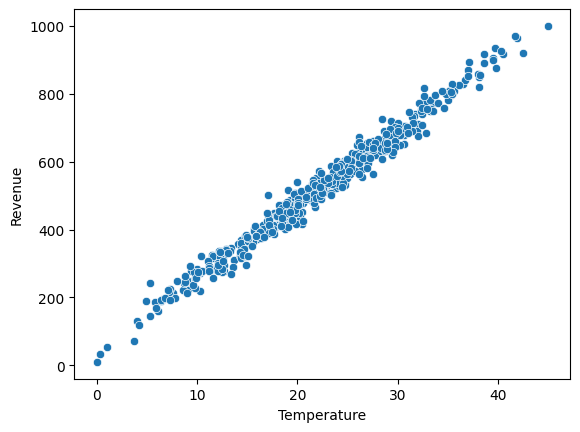

In [ ]:
sns.scatterplot(x=icecream_df['Temperature'], y=icecream_df['Revenue']);

# Seção 4: Configuração da Base de Dados de Treinamento

In [ ]:
x_train = icecream_df['Temperature']
y_train = icecream_df['Revenue']

In [ ]:
x_train.shape, y_train.shape

((500,), (500,))

# Seção 5: Construção e Treinamento do Modelo

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, input_shape=[1]))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
16/16 [==============================] - 0s 1ms/step - loss: 722.2379
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 647.2559
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 646.2496
Epoch 4/500
16/16 [==============================] - 0s 1ms/step - loss: 629.9181
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 755.0110
Epoch 6/500
16/16 [==============================] - 0s 1ms/step - loss: 649.5245
Epoch 7/500
16/16 [==============================] - 0s 1ms/step - loss: 682.8651
Epoch 8/500
16/16 [==============================] - 0s 1ms/step - loss: 640.4999
Epoch 9/500
16/16 [==============================] - 0s 1ms/step - loss: 688.0096
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 766.5265
Epoch 11/500
16/16 [==============================] - 0s 1ms/step - loss: 726.8699
Epoch 12/500
16/16 [==============================] - 0s 1ms/step - loss: 648.8600
Epoch 13/500


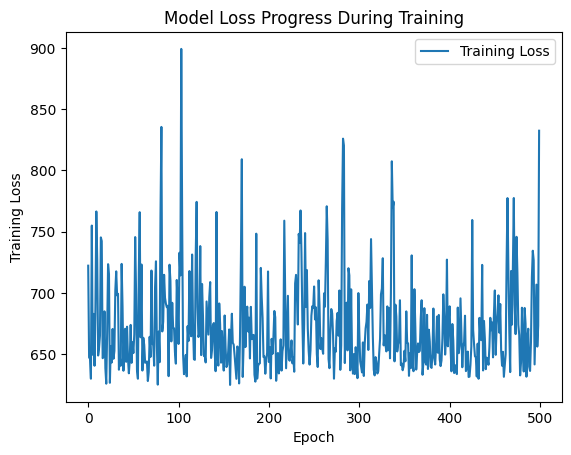

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [ ]:
model.get_weights()

[array([[ 0.0083018 , -0.02949498, -0.01780469,  2.0286572 , -0.43365276,
         -0.03070715,  0.05031072,  0.03390577,  0.3453592 , -4.1555004 ]],
       dtype=float32),
 array([-0.27929395,  0.5554892 ,  0.39025328,  3.408737  , -0.50035924,
         0.39581084, -1.3465886 , -0.44485128,  0.34671733, -5.582962  ],
       dtype=float32),
 array([[ 1.5699156e-02],
        [ 1.7128433e-03],
        [ 1.0168180e-04],
        [ 2.0727458e+00],
        [ 4.7333533e-01],
        [-1.8784158e-02],
        [-4.0944302e-03],
        [ 1.6636390e-02],
        [-3.4238553e-01],
        [-4.2229080e+00]], dtype=float32),
 array([15.344499], dtype=float32)]

# Seção 6: Resultados TensorFlow

In [ ]:
temperatures = 0, 10, 25, 40
revenues = model.predict(temperatures)
revenues

1/1 [==============================] - 0s 72ms/step


array([[ 45.618015],
       [259.92493 ],
       [581.38525 ],
       [902.8456  ]], dtype=float32)

16/16 [==============================] - 0s 902us/step


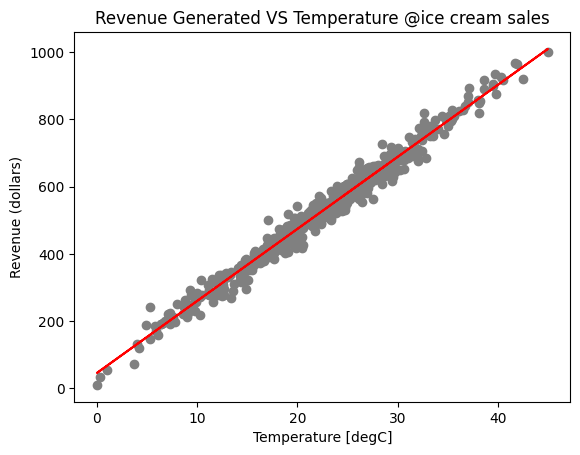

In [ ]:
plt.scatter(x_train, y_train, color="gray")
plt.plot(x_train, model.predict(x_train), color='red')
plt.ylabel('Revenue (dollars)')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated VS Temperature @ice cream sales');

# Seção 7: Confirmando resultados com Sklearn

In [ ]:
x_train.shape

(500,)

In [ ]:
x_train = x_train.values.reshape(-1, 1)

In [ ]:
x_train.shape

(500, 1)

In [ ]:
y_train = y_train.values.reshape(-1, 1)
y_train.shape

(500, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([[21.44362551]])

In [ ]:
regressor.intercept_

array([44.83126709])

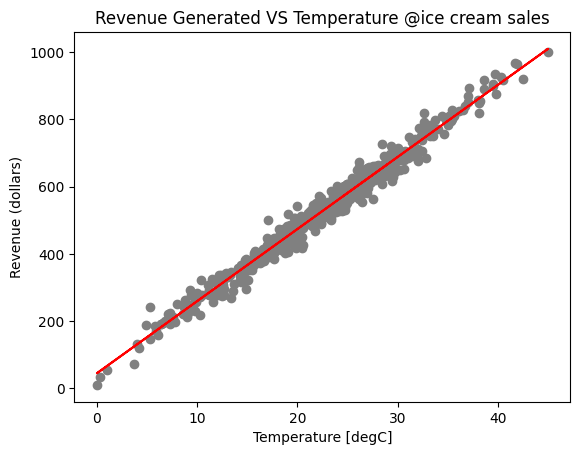

In [ ]:
plt.scatter(x_train, y_train, color="gray")
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.ylabel('Revenue (dollars)')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated VS Temperature @ice cream sales');

# Seção 8: Resultados TensorFlow

In [ ]:
temperatures = [[0], [10], [25], [40]]
revenues = regressor.predict(temperatures)
revenues

array([[ 44.83126709],
       [259.2675222 ],
       [580.92190486],
       [902.57628752]])